In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
%pylab inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import product
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Загружаем подготовленные данные.

In [2]:
data = pd.read_csv('c6w4.csv', sep=';')
data.set_index('index', inplace = True)
data.head()

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
index,,,,,,,,,,,,,,,,,,,,,
2015-12-01 00:00:00,19,43,26,76,91,129,202,230,212,56,...,3,0,2,97,29,96,16,246,31,118
2015-12-01 01:00:00,16,22,12,29,71,84,89,118,177,18,...,7,0,0,2,0,17,4,104,5,75
2015-12-01 02:00:00,8,19,3,9,21,42,76,99,180,14,...,5,0,0,0,0,4,1,28,0,0
2015-12-01 03:00:00,3,12,5,7,17,33,45,93,136,12,...,7,0,0,0,0,0,0,50,0,0
2015-12-01 04:00:00,2,12,3,7,21,33,27,62,80,3,...,4,1,0,4,2,2,0,23,1,15


In [3]:
data.shape

(4392, 102)

In [4]:
data1 = data.loc[:"2016-05-31 23:00:00",:]

Перед проведением кластеризации стандартизуйте столбцы (вычтите выборочное среднее и поделите на выборочную дисперсию).

In [5]:
data2 = data1.copy()
for i in range(len(data1.columns)):
    data2[data1.columns[i]] = (data1[data1.columns[i]] - data1[data1.columns[i]].mean())/data1[data1.columns[i]].std()

In [6]:
data2

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
index,,,,,,,,,,,,,,,,,,,,,
2015-12-01 00:00:00,-1.070632,-1.072865,-0.977586,0.263073,-0.903806,-0.975355,-0.540373,-0.554732,-0.772363,-1.005224,...,-0.417812,-0.883614,-0.637070,-0.712444,-1.060241,0.143982,0.790381,1.472974,0.052275,1.373504
2015-12-01 01:00:00,-1.147413,-1.326278,-1.218205,-0.909154,-1.107733,-1.292768,-1.199678,-1.116285,-0.920473,-1.513770,...,0.462192,-0.883614,-1.005350,-1.342141,-1.282253,-1.205040,-0.681363,-0.393560,-0.938660,0.251298
2015-12-01 02:00:00,-1.352162,-1.362480,-1.372889,-1.407974,-1.617550,-1.589021,-1.275527,-1.211549,-0.907778,-1.567301,...,0.022190,-0.883614,-1.005350,-1.355398,-1.282253,-1.427031,-1.049299,-1.392550,-1.129224,-1.706037
2015-12-01 03:00:00,-1.480130,-1.446951,-1.338515,-1.457856,-1.658335,-1.652503,-1.456398,-1.241632,-1.093973,-1.594066,...,0.462192,-0.883614,-1.005350,-1.355398,-1.282253,-1.495336,-1.171944,-1.103369,-1.129224,-1.706037
2015-12-01 04:00:00,-1.505723,-1.446951,-1.372889,-1.457856,-1.617550,-1.652503,-1.561420,-1.397062,-1.330948,-1.714512,...,-0.197811,-0.803860,-1.005350,-1.328884,-1.266942,-1.461184,-1.171944,-1.458273,-1.091111,-1.314570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-31 19:00:00,1.156014,0.423479,1.514542,0.562365,1.155855,0.943232,0.807408,-0.283982,0.141685,1.216320,...,-0.857814,-0.484843,0.651912,0.944655,1.045045,0.280591,0.667736,0.500273,-0.481305,0.982037
2016-05-31 20:00:00,0.976858,0.411412,1.411419,-0.011278,1.237425,0.583497,0.638206,0.051947,0.209392,0.788070,...,-1.077815,0.392451,0.836052,0.871742,0.792411,1.134403,1.648898,1.972469,3.291870,1.190820
2016-05-31 21:00:00,0.592954,0.495883,0.414568,0.312955,0.778590,0.512960,0.708220,0.427988,0.416746,0.560563,...,-1.077815,2.067285,-0.084649,0.560208,1.060356,1.356394,2.016834,1.026058,2.072257,1.686678


Кластеризуйте географические зоны по значениям стандартизованных рядов. Подберите число кластеров так, чтобы оно было не слишком большим, но ряды внутри кластеров имели похожую форму. Постройте графики стандартизованных рядов каждого кластера, чтобы в этом убедиться.

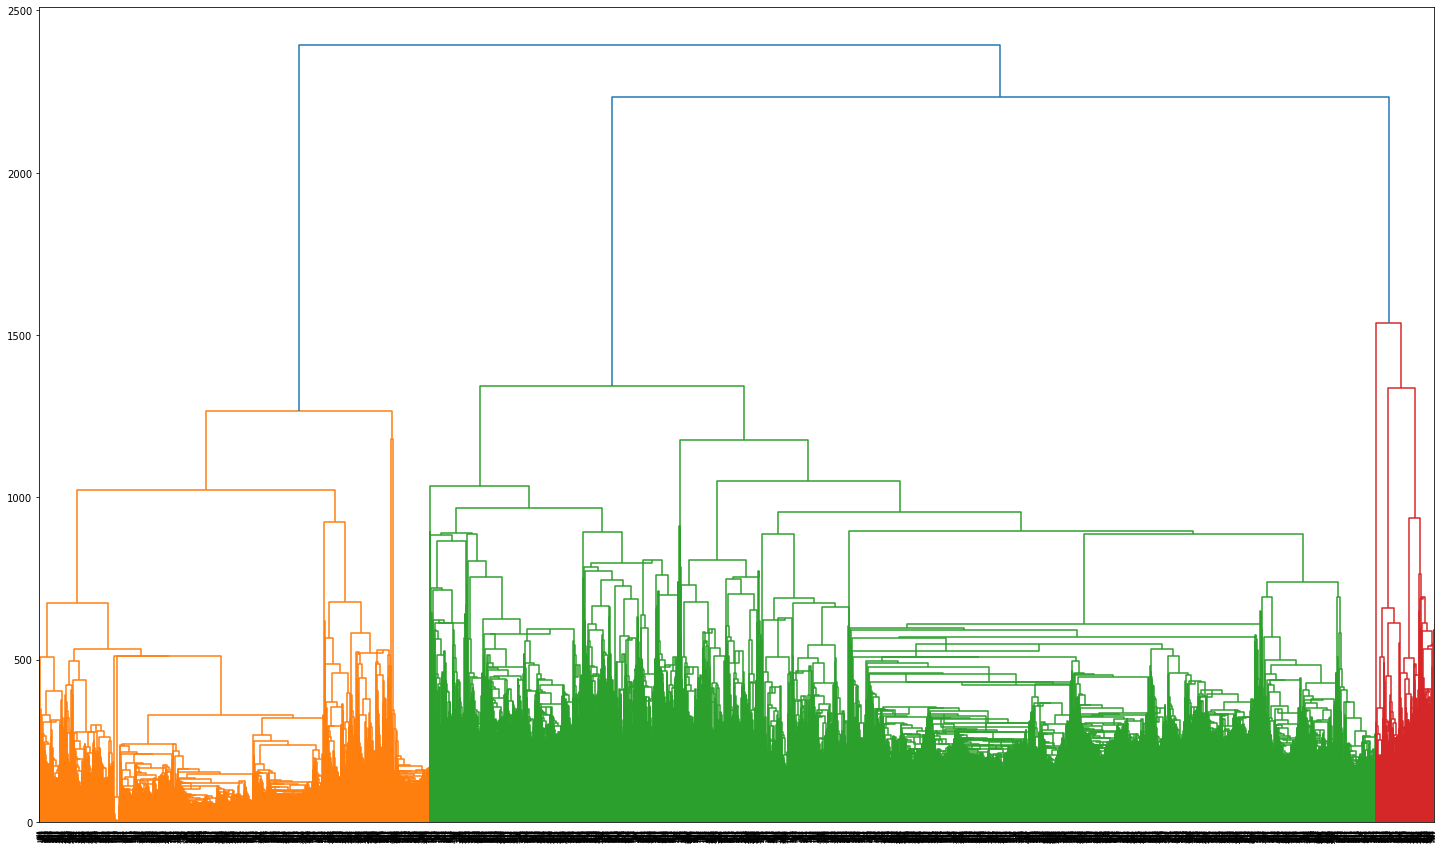

In [7]:
# Определим количество предпологаемых кластеров

fig = pylab.figure(figsize=(25,15))
Y = sch.linkage(data1.values, method='centroid')
Z1 = sch.dendrogram(Y, orientation='top')

In [8]:
# Четко видно 3 основных кластера
random_state = 42
n_clusters = 3
res = KMeans(n_clusters = n_clusters, random_state=42).fit_predict(data2.values.transpose())

score = silhouette_score(data2.values.transpose(), res)

print ('Коэффициент силуэта (кластеризации) равен', score)


Коэффициент силуэта (кластеризации) равен 0.25550216579499974


<Figure size 1440x2160 with 0 Axes>

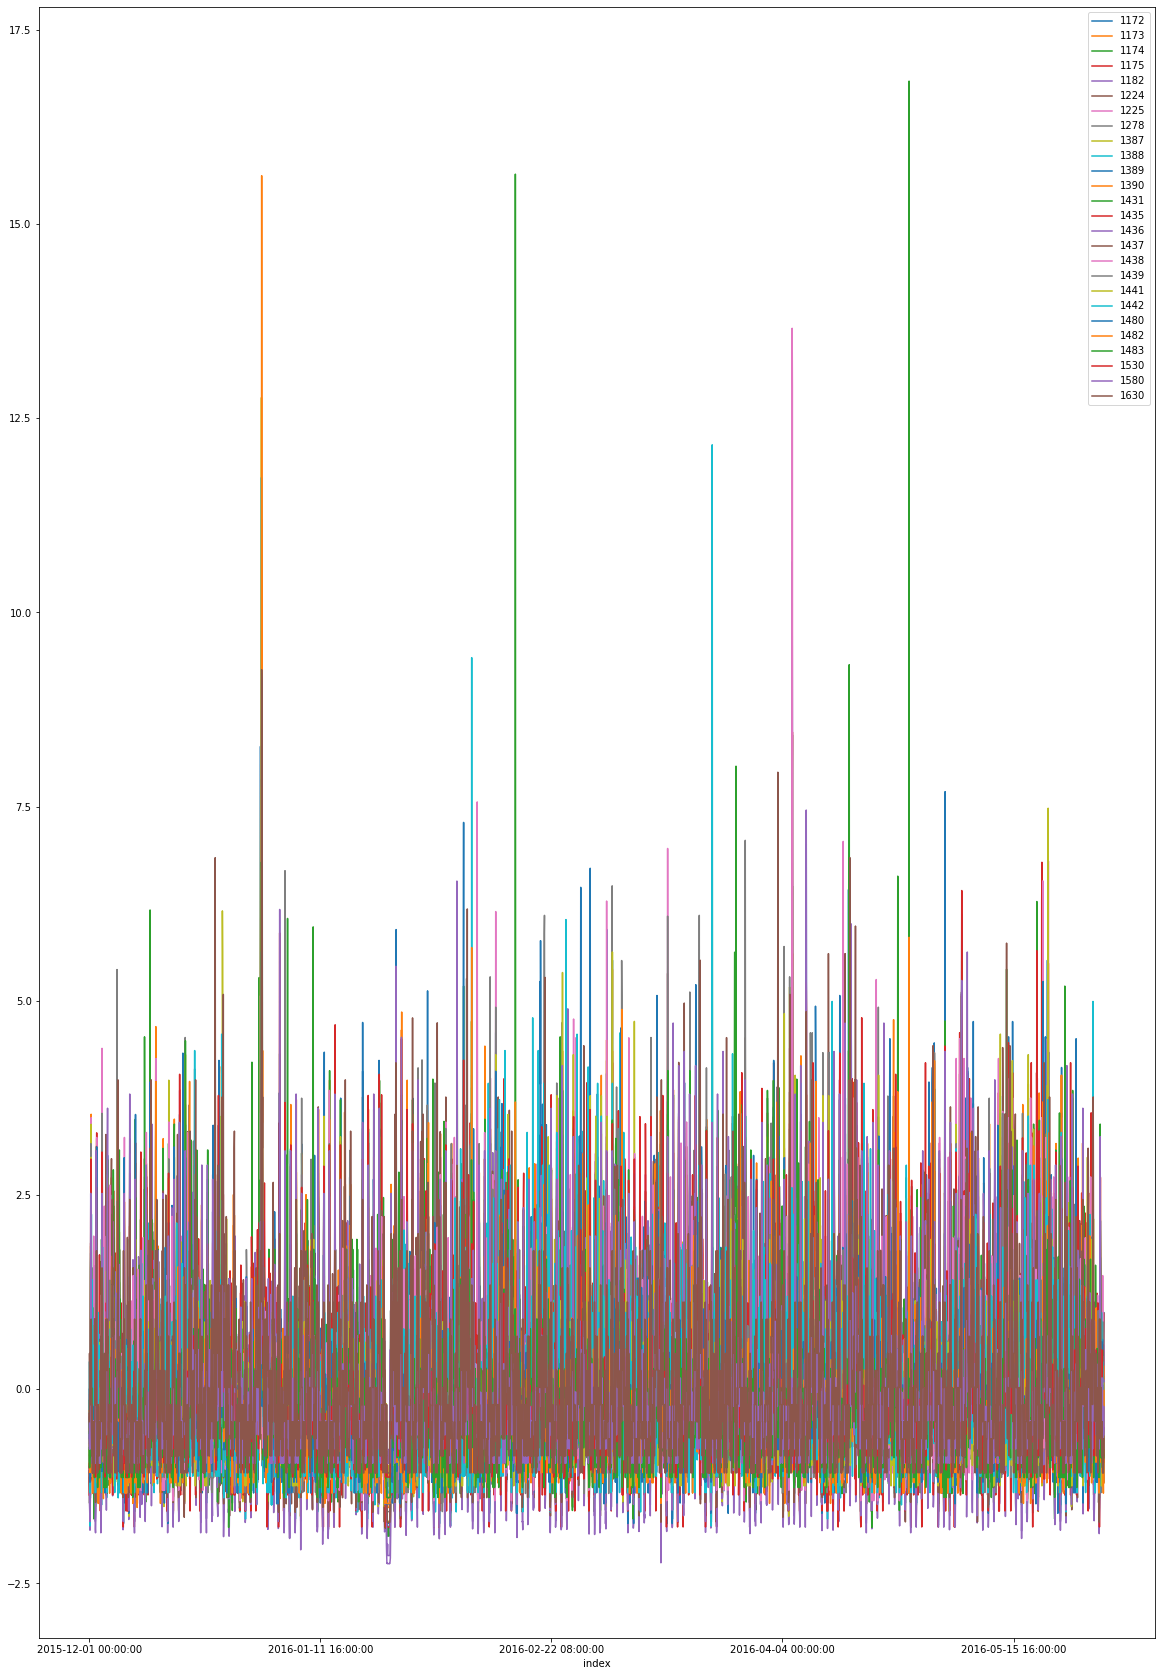

<Figure size 1440x2160 with 0 Axes>

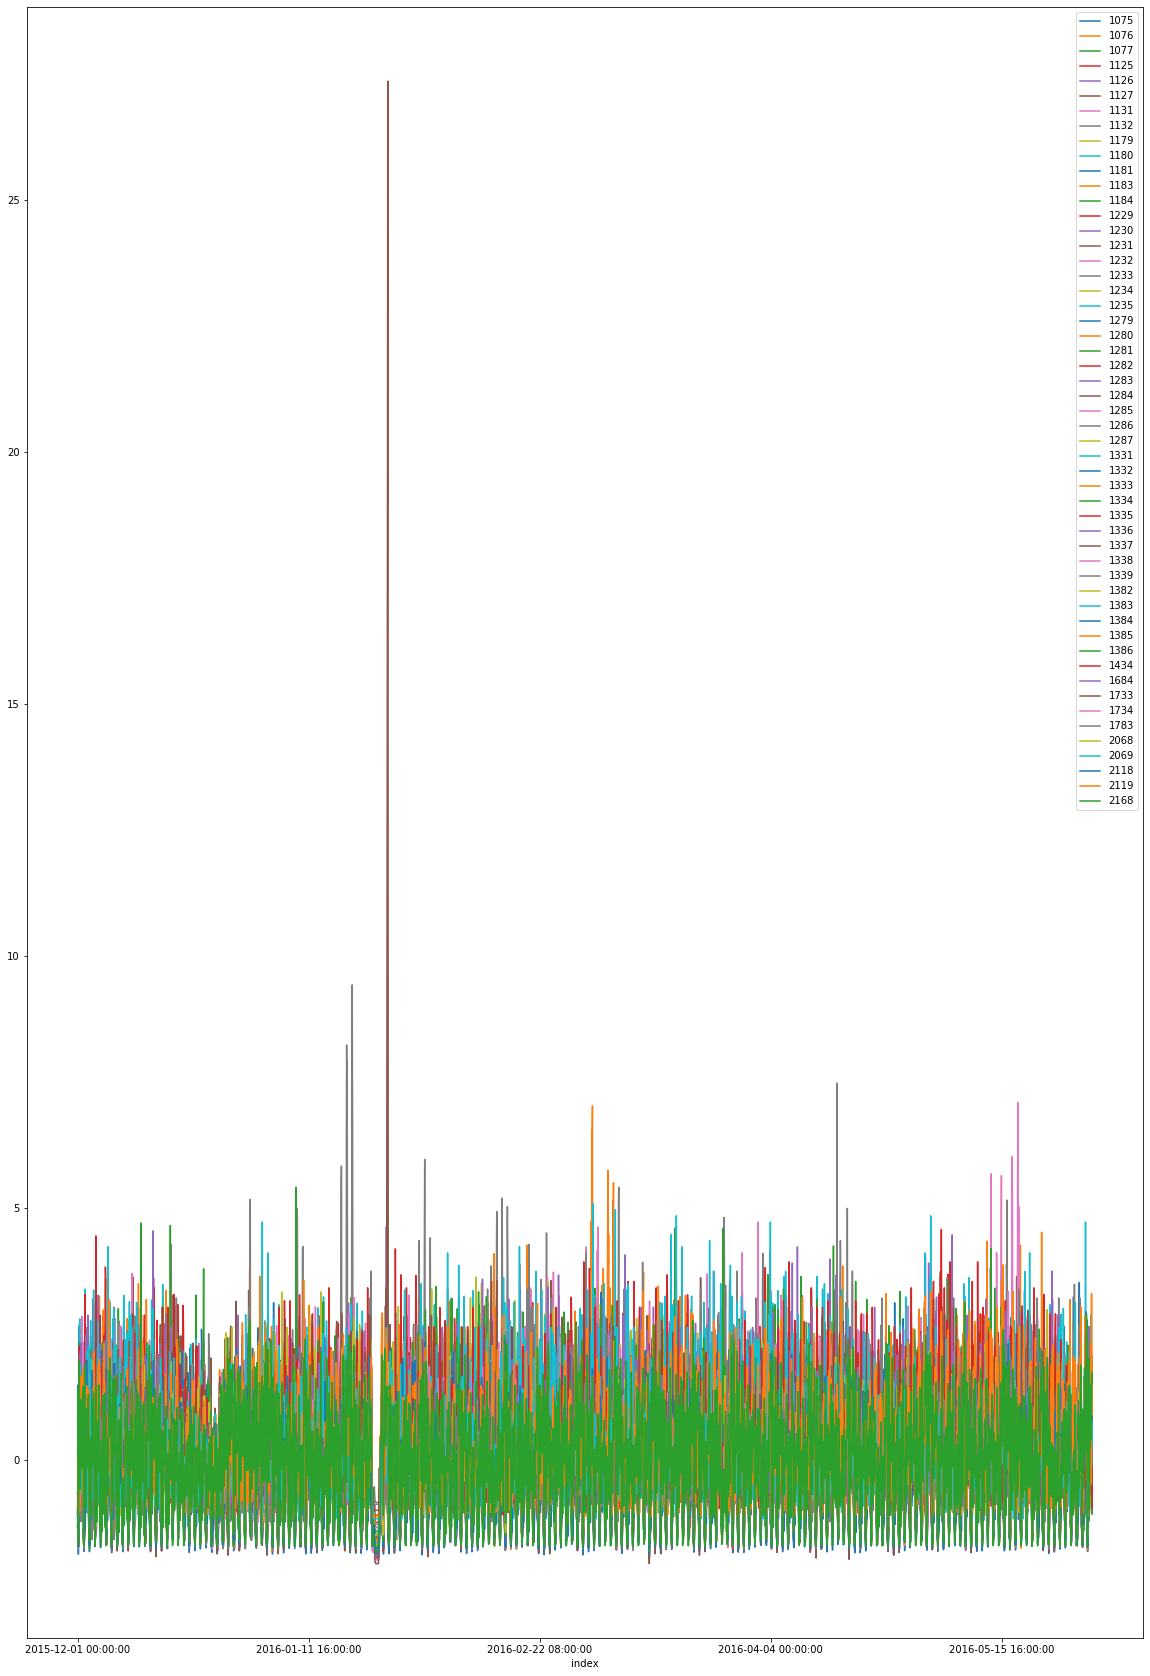

<Figure size 1440x2160 with 0 Axes>

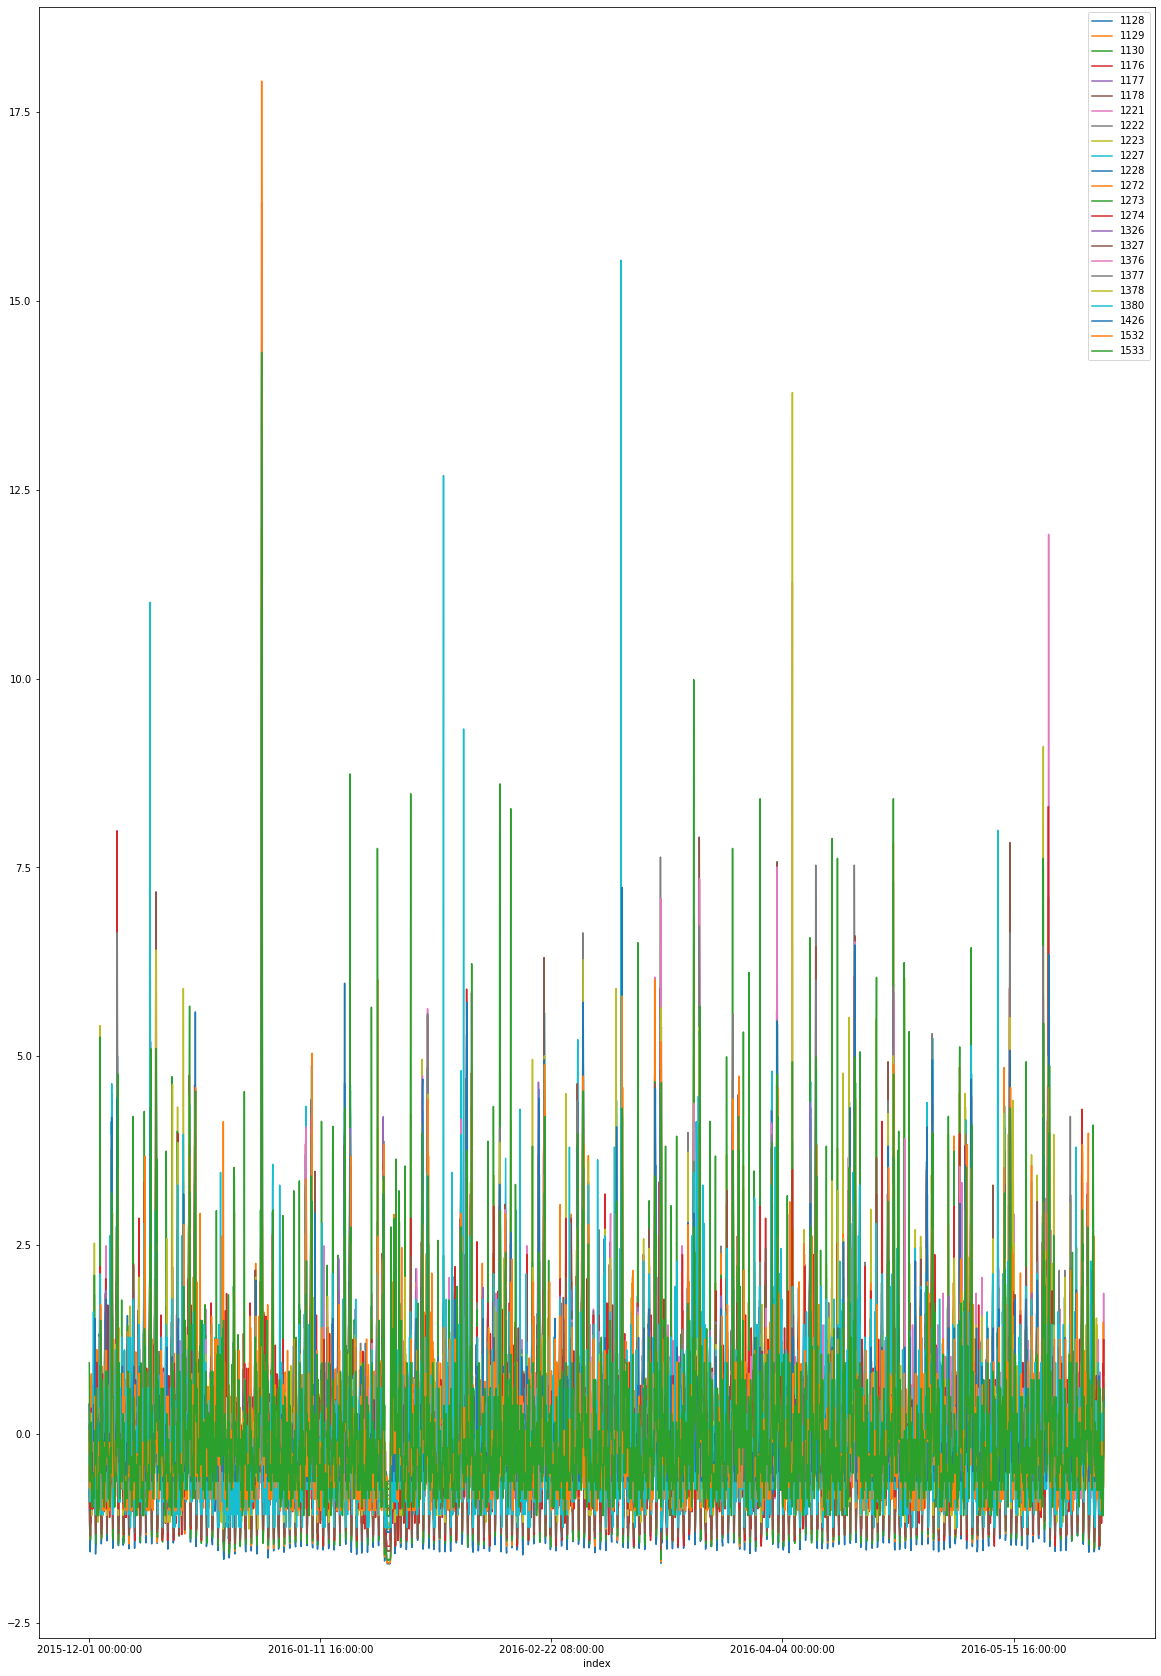

In [9]:
#Значение не идеально, но при изменении количества кластеров, коэффициент ещё больше падает, значит количество 3 -оптимально.
#Нарисуем графики
for i in range(n_clusters):
    plt.figure(figsize(20,30))
    data2.loc[:,res == i].plot()
    pylab.show()

В каждом кластере выберите наиболее типичный ряд (например, это может быть ряд, соответствующий центру кластера).

In [10]:
# находим центры 3-х кластеров

res1 = KMeans(n_clusters = n_clusters, random_state=42).fit(data2.values.transpose())
res1.cluster_centers_[2]

array([-0.14126201, -0.43732593, -0.56894733, ...,  0.10386819,
        0.32540694,  0.19265439])

In [11]:
center4 = np.zeros((n_clusters,2))
for i in range(n_clusters):
    id4 = 0
    k4 = 0
    
    for j in range(len(data2.columns[res == i])):
        coef4 = sklearn.metrics.r2_score(data2.loc[:,data2.columns[res == i][j]], res1.cluster_centers_[i])
        if abs(coef4)>k4 :
            k4= coef4
            id4= data2.columns[res == i][j]
    center4[i, 0] = id4
    center4[i, 1] = k4
    print ('для кластера ', i, ' лучший район ', center4[i][0], ' с коэффициентом ', center4[i][1])

для кластера  0  лучший район  1387.0  с коэффициентом  0.7216699976782575
для кластера  1  лучший район  1285.0  с коэффициентом  0.8864163035834681
для кластера  2  лучший район  1326.0  с коэффициентом  0.8791903222443755


Для выбранных географических зон подберите на исходных рядах оптимальную структуру моделей — набор регрессионных признаков и значения гиперпараметров p,d,q,P,D,Qp,d,q,P,D,Q — так, как это делалось на прошлой неделе.

<Figure size 1440x720 with 0 Axes>

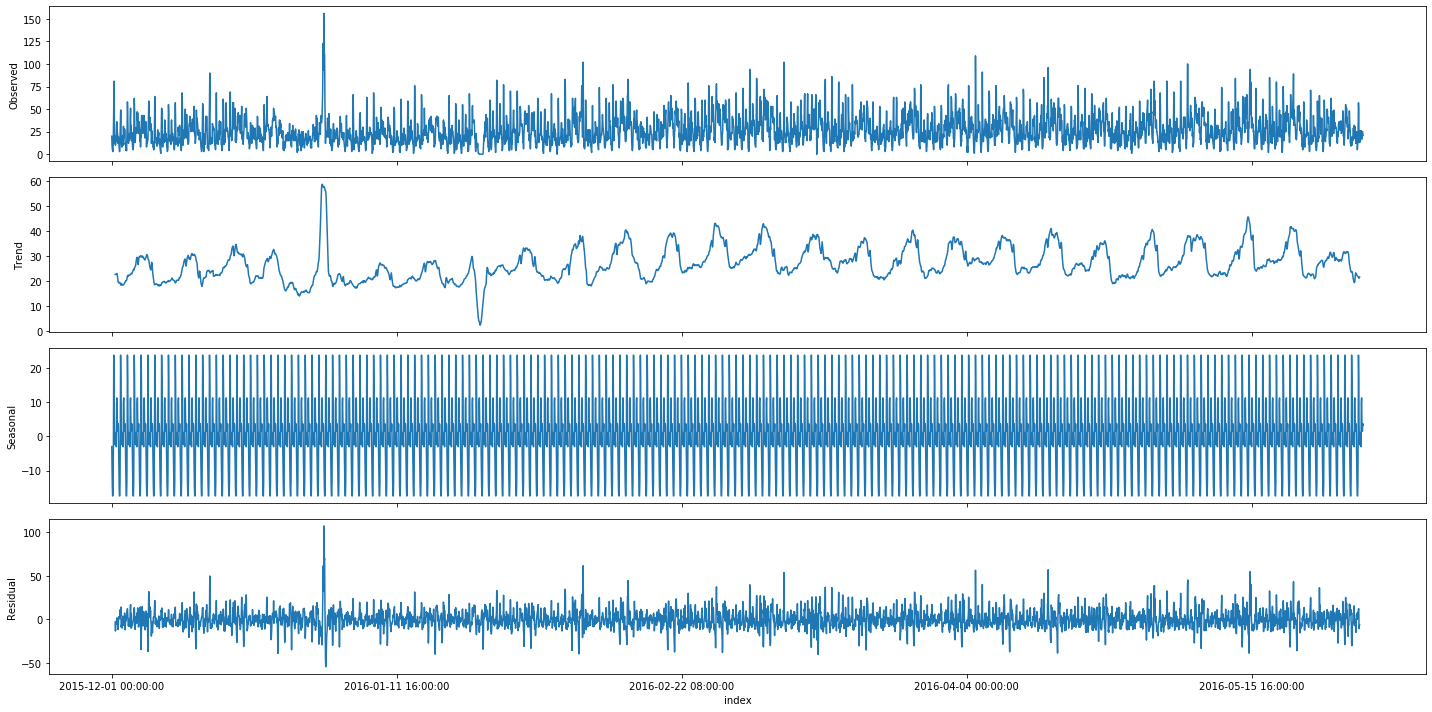

<Figure size 1440x720 with 0 Axes>

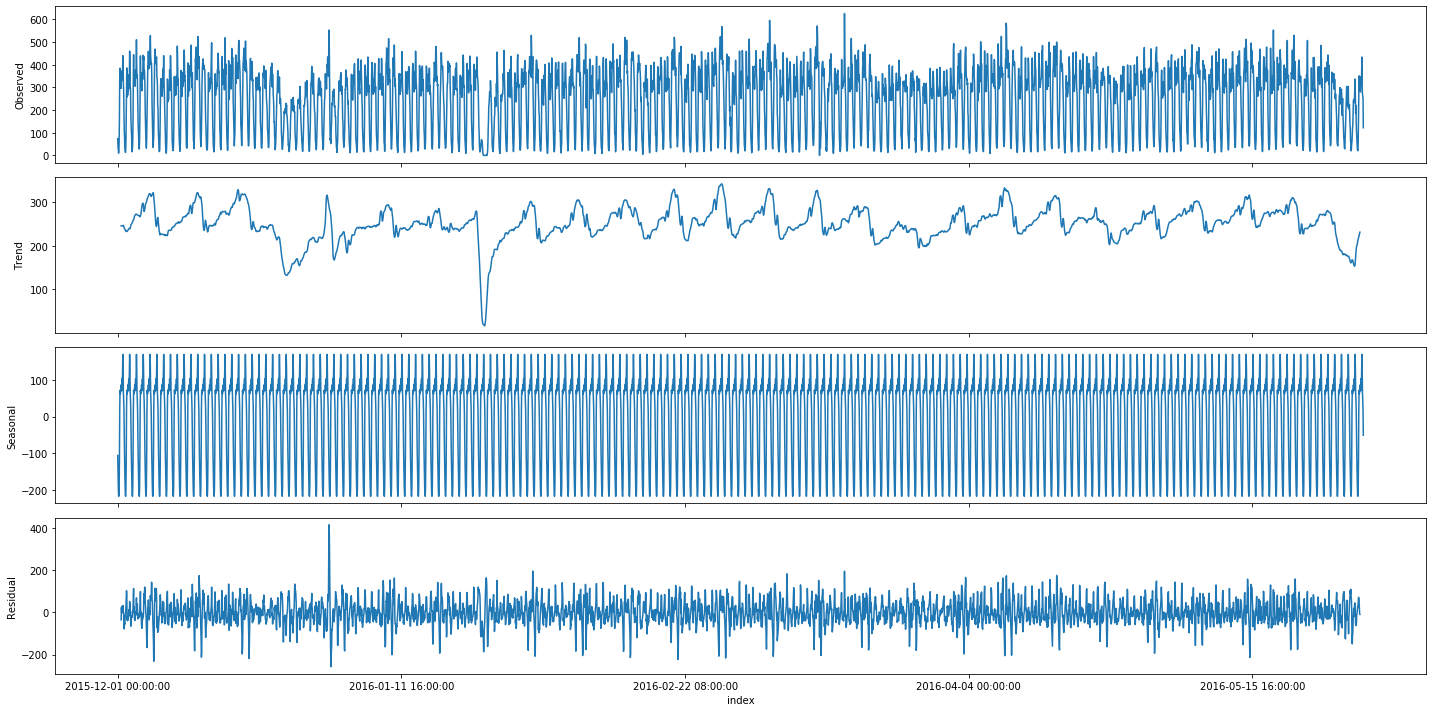

<Figure size 1440x720 with 0 Axes>

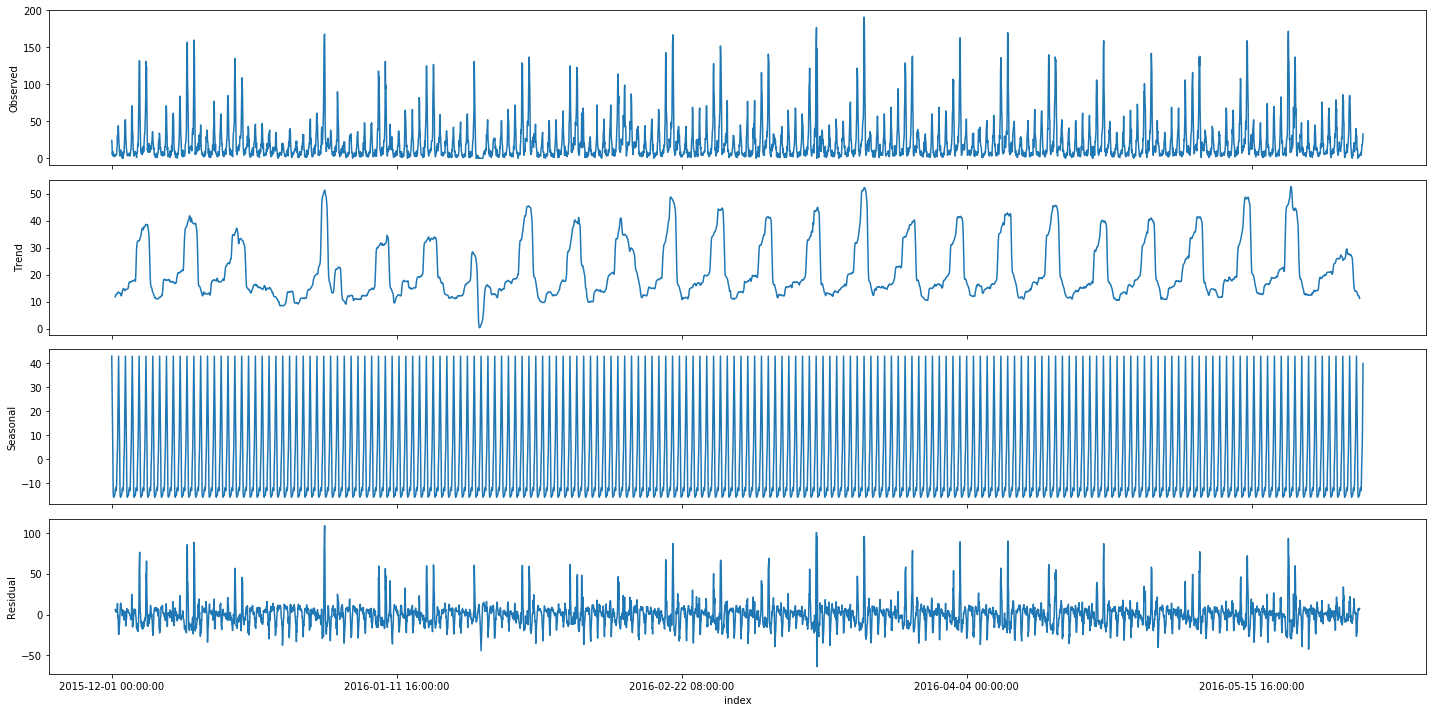

In [12]:
for i in range(n_clusters):
    plt.figure(figsize(20,10))
    sm.tsa.seasonal_decompose(data1.loc[:,str(int(center4[i][0]))], freq= 24).plot()

<Figure size 1440x720 with 0 Axes>

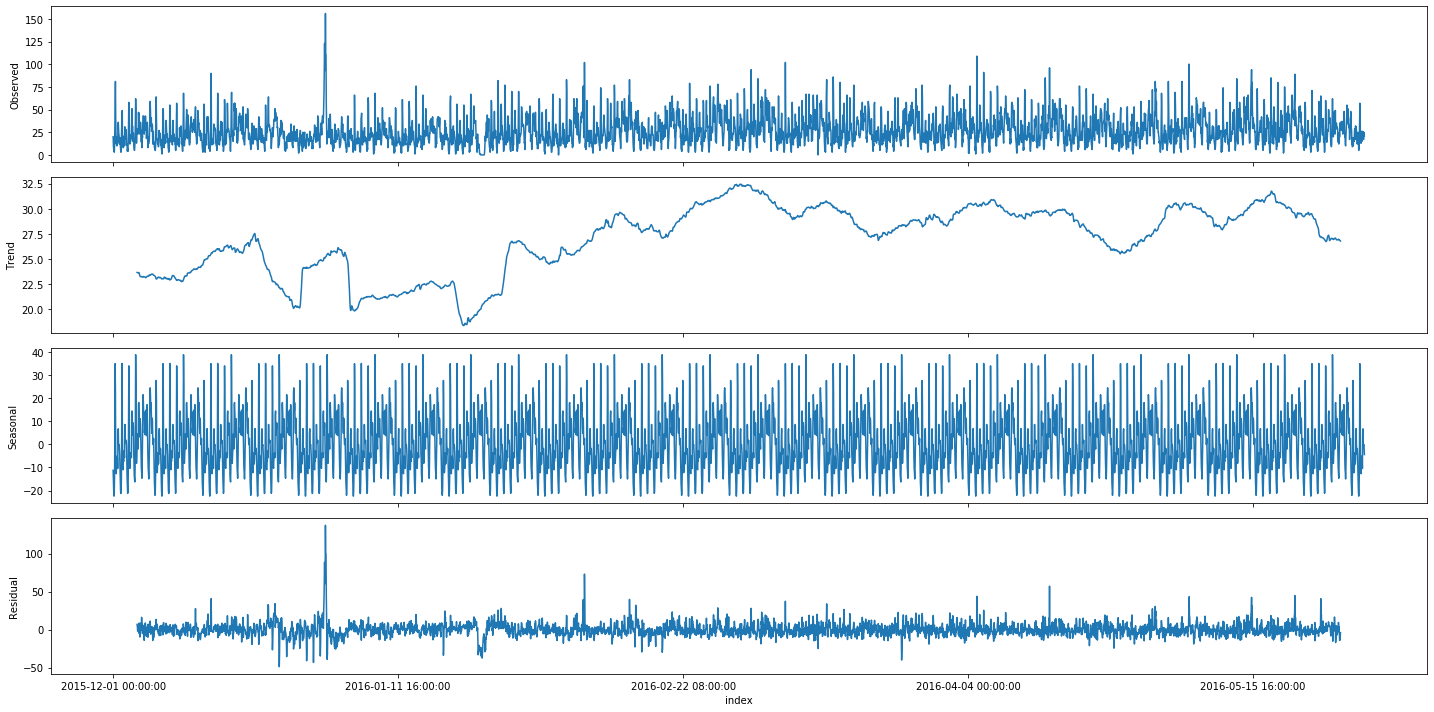

<Figure size 1440x720 with 0 Axes>

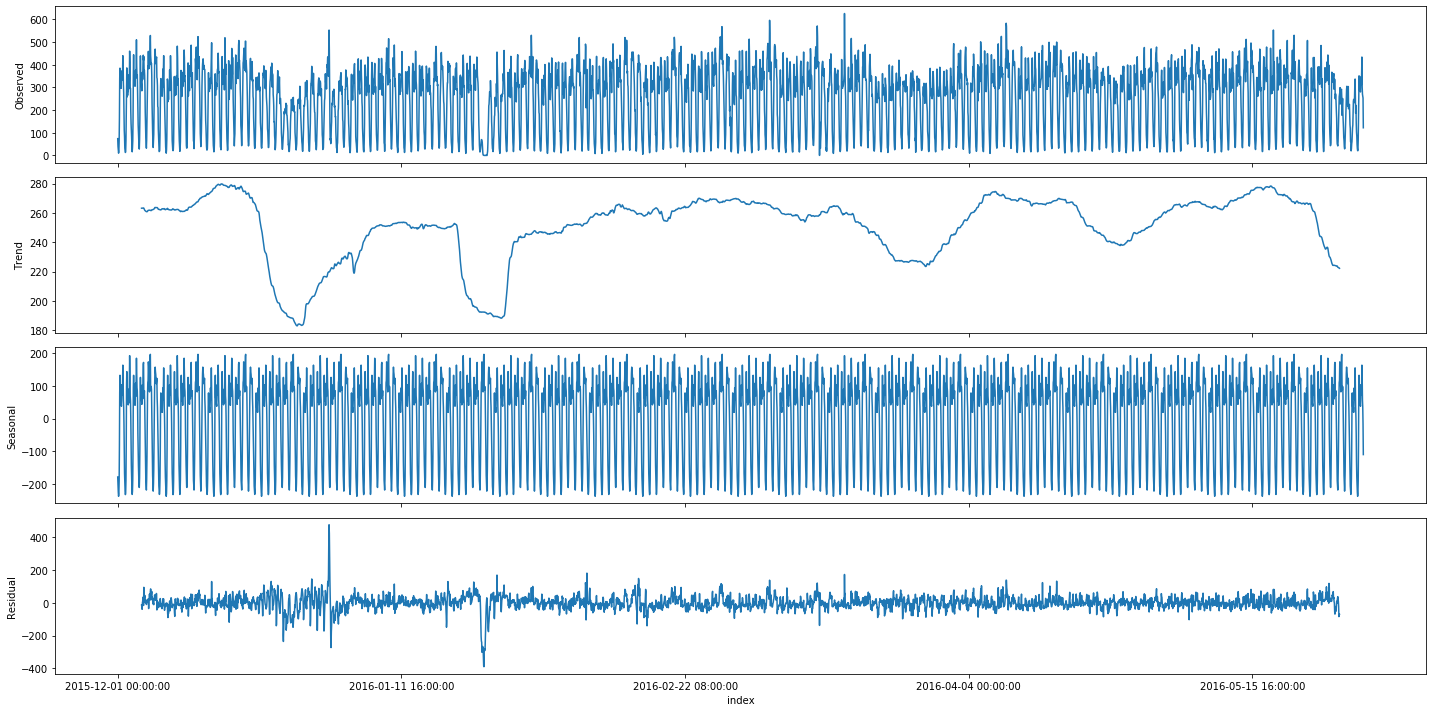

<Figure size 1440x720 with 0 Axes>

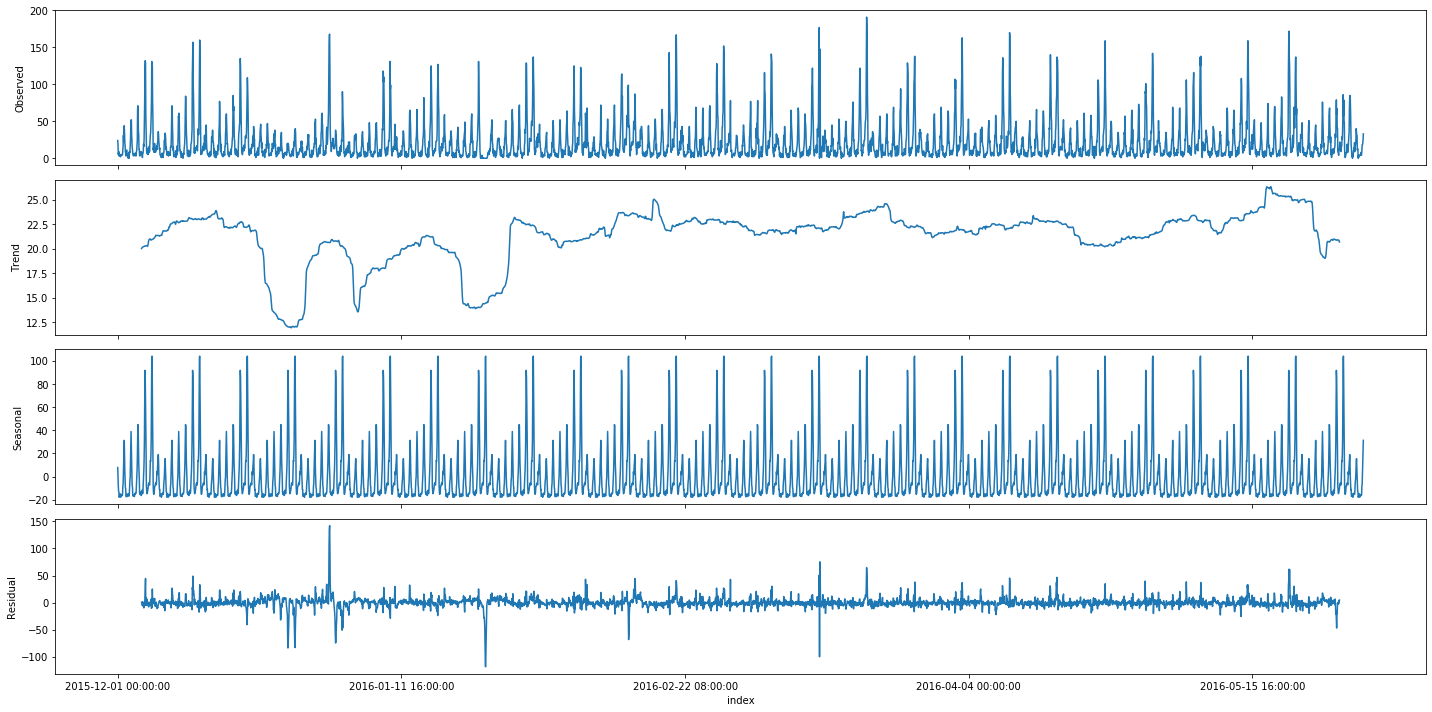

In [13]:
for i in range(n_clusters):
    plt.figure(figsize(20,10))
    sm.tsa.seasonal_decompose(data1.loc[:,str(int(center4[i][0]))], freq= 168).plot()

На моё удивления графики всех центров оказались довольно разными, это говорит, что действительно подобрав параметры для временных рядов можно закрыть решения для всех районов.

Минимальное отклонение при K = 119.0 для кластера 0
Минимальное отклонение при K = 119.0 для кластера 1
Минимальное отклонение при K = 119.0 для кластера 2
Wall time: 56.8 s


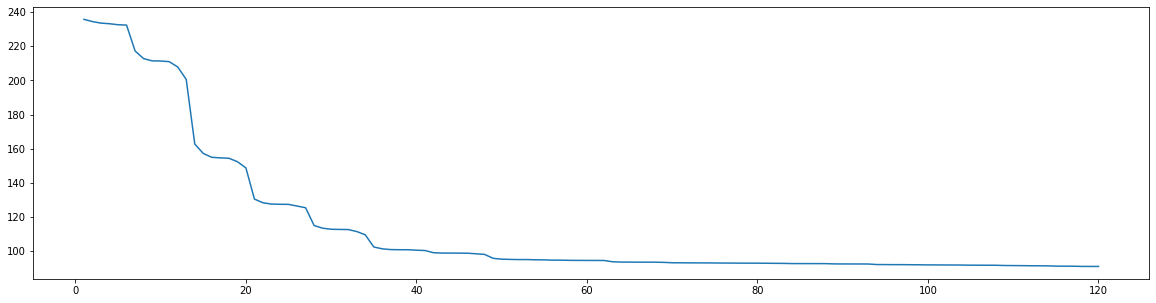

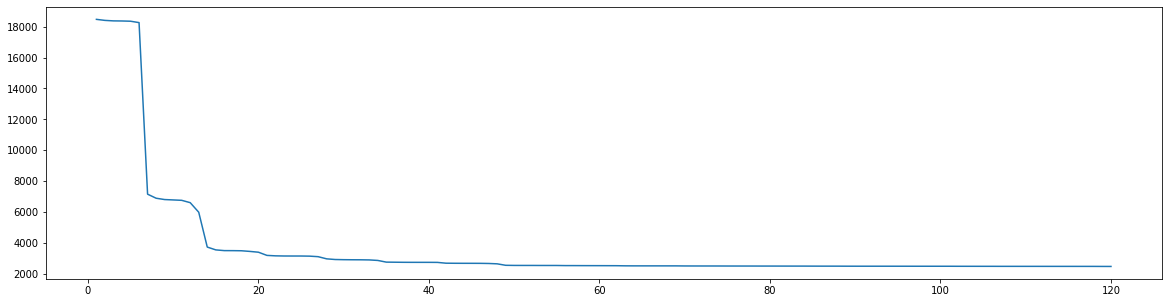

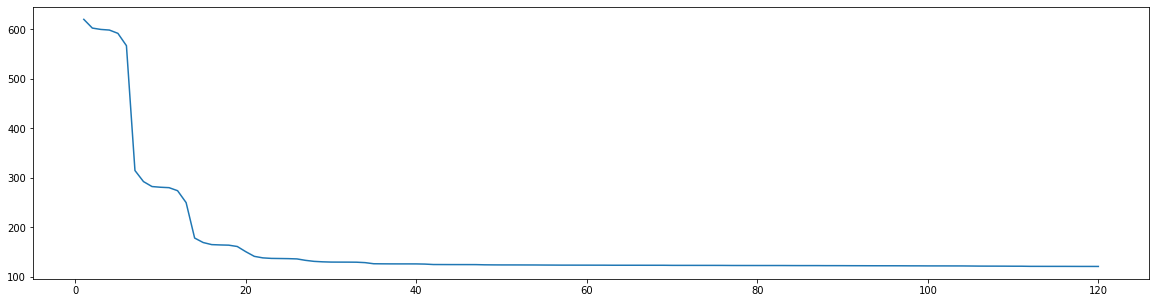

In [16]:
%%time
K_opt = np.zeros(n_clusters)
K = 120
    
for i in range(n_clusters):
    k1= []
    for j in range (1, K+1):
        data5 = pd.DataFrame(np.nan_to_num(data1.loc[:,str(int(center4[i][0]))]), columns =['su'])
        for l in range(1, j+1):        
            data5['sin'+str(l)] = np.sin(np.arange(1, len(data1.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
            data5['cos'+str(l)] = np.cos(np.arange(1, len(data1.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
        X = data5.loc[:, 'sin1':]
        y = data5.su
        model = LinearRegression()
        stud = model.fit(X, y)
        k1.append(mean_squared_error(y, stud.predict(X)))
        K_opt[i] = np.argmin(k1)
    
    del data5
    plt.figure(figsize(20, 5))
    plt.plot(np.arange(1, K+1),k1)
    del k1
    print ('Минимальное отклонение при K =', K_opt[i], 'для кластера', i)


Коэффициент детерминации модели: 0.6204050196531532 для кластера 0
Критерий Дики-Фуллера: p=0.000000 для кластера 0


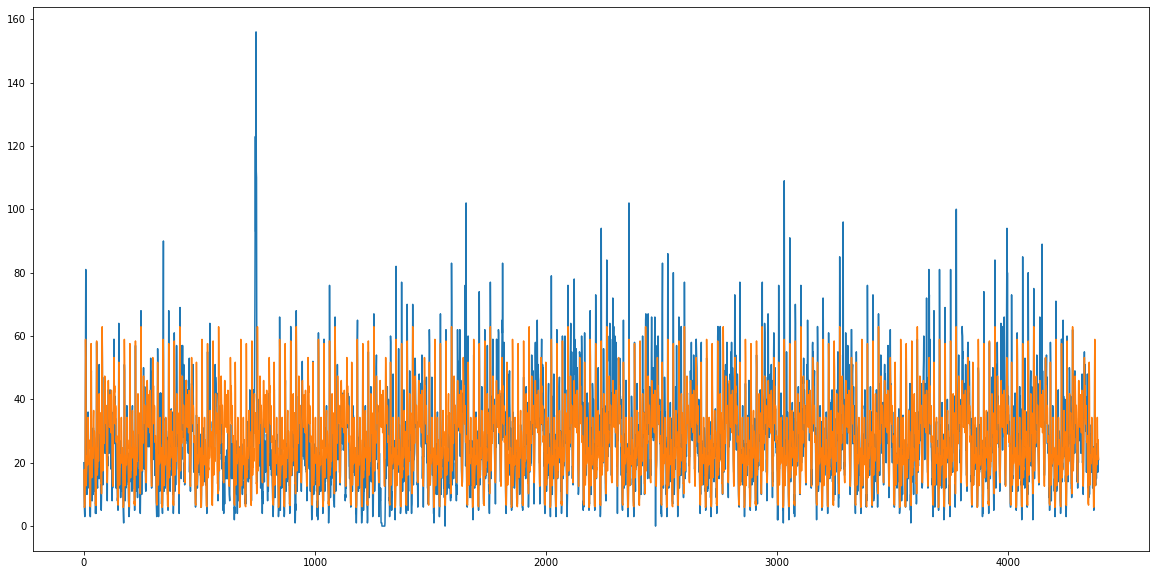

<Figure size 1080x720 with 0 Axes>

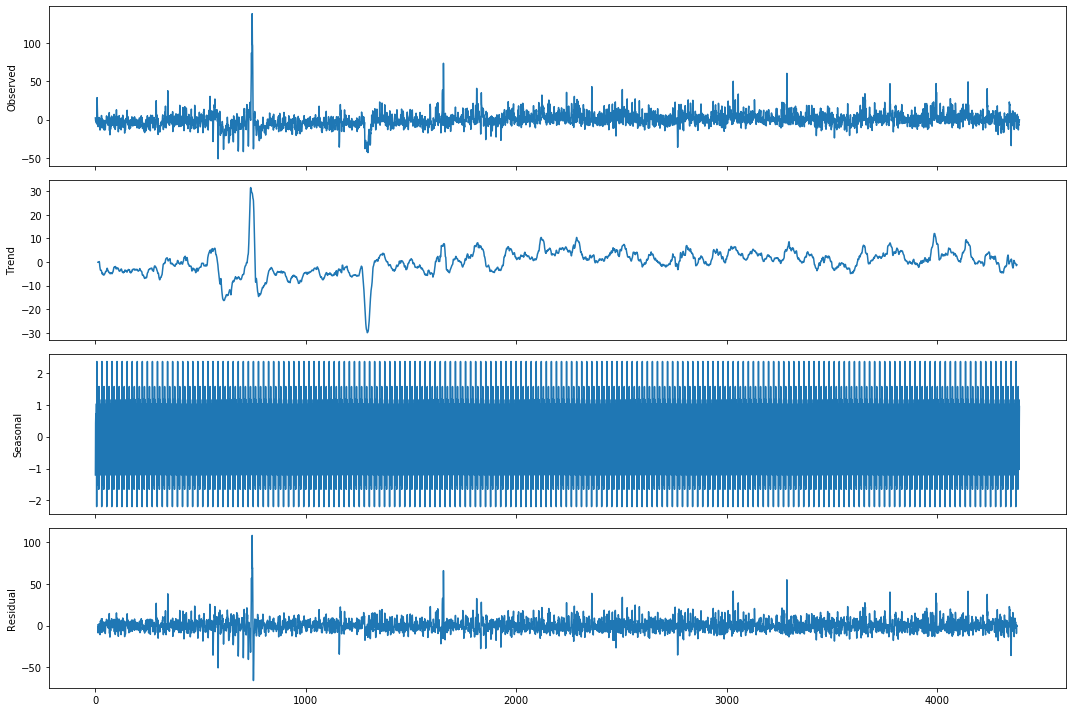

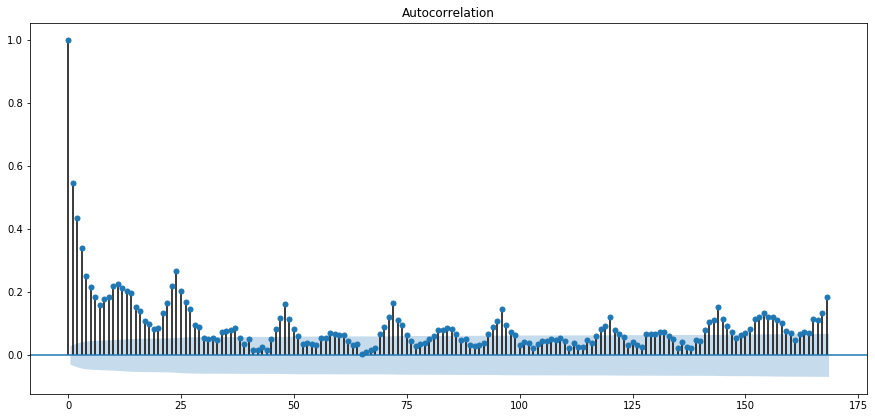

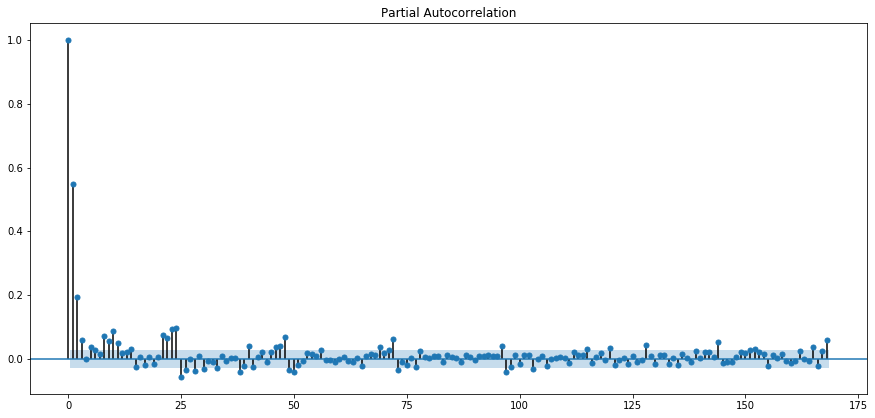

LinAlgError: SVD did not converge in Linear Least Squares

In [20]:
# Судя по графикам оптимально К для всех зон будет 50.
Kopt=50
      
for i in range(n_clusters):
    data5 = pd.DataFrame(np.nan_to_num(data1.loc[:,str(int(center4[i][0]))]), columns =['su'])
    for l in range(1, Kopt+1):        
        data5['sin'+str(l)] = np.sin(np.arange(1, len(data1.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
        data5['cos'+str(l)] = np.cos(np.arange(1, len(data1.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
    y = data5.su
    X_opt = data5.loc[:, 'sin1':]
    model = LinearRegression()
    stud = model.fit(X_opt, y)
    y_pred = stud.predict(X_opt)
    data5['prediction'] = y_pred
    data5['error'] = y - y_pred
    print ('Коэффициент детерминации модели:', stud.score(X_opt, y), 'для кластера', i)
    
    plt.figure(figsize(20, 10))
    data5['su'].plot()
    data5['prediction'].plot()

    plt.figure(figsize(15,10))
    sm.tsa.seasonal_decompose(data5['error'], freq = 24).plot()
    print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data5['su'])[1], 'для кластера', i)
    
    plt.figure(figsize(15,15))
    ax = plt.subplot(211)
    sm.graphics.tsa.plot_acf(data5['error'].values.squeeze(), lags=168, ax=ax)
    pylab.show()
    ax = plt.subplot(212)
    sm.graphics.tsa.plot_pacf(data5['error'].values.squeeze(), lags=168, ax=ax)
    
    pylab.show()
    
    del data5
        


Выбранные значения параметров для кластеров:0) Q = 1 q = 2 P = 1 p = 3; 1) Q = 1 q = 3 P = 1 p = 4; 2) Q = 1 q = 4 P = 1 p = 4, так как параметры похожы, возьмем максимально подходящие для всех- это значения последнего кластера.

In [ ]:
ps = range(0, 5)
d=1
qs = range(0, 5)
Ps = range(0, 2)
D=1
Qs = range(0, 2)
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)*n_clusters

In [ ]:
%%time

best_aic = float("inf")
warnings.filterwarnings('ignore')
best_model =[]
param_aic = []

for i in range(n_clusters):
    results = []
    best_aic1 = float("inf")


    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            model=sm.tsa.statespace.SARIMAX(data1.loc[:,str(int(center4[i][0]))], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24), initialization='approximate_diffuse').fit(disp=-1)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters:', param)
            continue
        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic1:
            best_model1 = model
            best_aic1 = aic
            best_param1 = param
            #param_aic[i] = param
        results.append([param, model.aic])
    
    warnings.filterwarnings('default')
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    print(result_table.sort_values(by = 'aic', ascending=True).head())
    best_model.append(best_model1)
    param_aic.append(best_param1)
    #param_aic.append(result_table.sort_values(by = 'aic', ascending=True).head(1))
    print(best_model1.summary())
    del results
    del best_aic1
    del result_table




In [ ]:
best_model[1].summary()

In [ ]:
for i in range(n_clusters):
    plt.figure(figsize(15,8))
    plt.subplot(211)
    best_model[i].resid[:].plot()
    plt.ylabel(u'Residuals')

    ax = plt.subplot(212)
    sm.graphics.tsa.plot_acf(best_model[i].resid[:].values.squeeze(), lags=168, ax=ax)
    print("Кластер ", i )
    
    print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model[i].resid[:])[1])

Для каждой из RR географических зон настройте на данных до апреля 2016 включительно модель ARIMA с гиперпараметрами, соответствующими кластеру этой зоны. Для каждого конца истории от 2016.04.30 23:00 до 2016.05.31 17:00 постройте прогноз на 6 часов вперёд и посчитайте в ноутбуке ошибку прогноза по следующему функционалу

In [ ]:
%%time
# Создаем мега цикл, который посчитает остатки
# Возмем Kopt побольше, мощность позволяет
Kopt= 100
Q = 0. # ошибка в мае
model = LinearRegression()
data_pred_lin= pd.DataFrame(index=data.index[(len(data.index)-1104):], columns = data.columns)
data_ost_lin= pd.DataFrame(index=data.index[(len(data.index)-1104):], columns = data.columns)



for i in range(n_clusters):
    data5 = pd.DataFrame(index=data.index)
    for l in range(1, Kopt+1):        
        data5['sin'+str(l)] = np.sin(np.arange(1, len(data.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
        data5['cos'+str(l)] = np.cos(np.arange(1, len(data.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
    X_test = data5.loc["2016-04-16 00:00:00":, 'sin1':]
    X_train = data5.loc[:"2016-04-15 23:00:00", 'sin1':]
    
    for j in range(len(data.columns[res == i])):
        Y_test = data.loc["2016-04-16 00:00:00":, data.columns[res == i][j]]
        Y_train = data.loc[:"2016-04-15 23:00:00", data.columns[res == i][j]]
        
        #Считаем ошибку по линейной регрессии
        
        stud = model.fit(X_train, Y_train)
        y_pred = stud.predict(X_test)
        data_pred_lin.loc[:, data.columns[res == i][j]] = y_pred
        data_ost_lin.loc[:, data.columns[res == i][j]] = Y_test - y_pred
        
        #Создаем модель SARIMA для каждой зоны по лучшим параметрам
        
        model_sarimax = sm.tsa.statespace.SARIMAX(data_ost_lin.loc[:"2016-04-30 23:00:00", data.columns[res == i][j]], 
                                             order=[param_aic[i][0],1,param_aic[i][1]],
                                             seasonal_order=[param_aic[i][2],1, param_aic[i][3],24], initialization='approximate_diffuse').fit(disp=False)
        
        model_sarimax_fit = sm.tsa.statespace.SARIMAX(data_ost_lin.loc[:, data.columns[res == i][j]], 
                                             order=[param_aic[i][0],1,param_aic[i][1]],
                                             seasonal_order=[param_aic[i][2],1, param_aic[i][3],24], initialization='approximate_diffuse').filter(model_sarimax.params)
        # Считаем ошибку при предсказании на 6 часов
        Q_zone = 0
        for time in range((len(data.index)-744),(len(data.index)-6)):
            model_sarimax_predicted = model_sarimax_fit.predict(data.index[time], data.index[time+6], dynamic=True)
            model_sarimax_predicted_all = model_sarimax_predicted[1:] + data_pred_lin.loc[data.index[time+1]:data.index[time+6], data.columns[res == i][j]]
            Q_zone += sum(abs(data.loc[data.index[time+1]:data.index[time+6], data.columns[res == i][j]]-model_sarimax_predicted_all))
        print ('зона ', str(data.columns[res == i][j]), ' Q_zone=', Q_zone)
        Q = Q + Q_zone
    
    del data5
    del X_test
    del X_train
Q = 1/(102*739*6.)*Q 
print ('Ошибка по всем зонам Q=', Q)    

In [ ]:
print ('Ошибка по всем зонам Q=', Q)
# Такая суммарная ошибка получилась по всем зонам.

Для каждой из RR географических зон настройте на данных до мая 2016 включительно модель ARIMA с гиперпараметрами, соответствующими кластеру этой зоны. Для каждого конца истории от 2016.05.31 23:00 до 2016.06.30 17:00 постройте прогноз на 6 часов вперёд и запишите все прогнозы в файл в формате id,y, где столбец id состоит из склеенных через подчёркивание идентификатора географической зоны, даты конца истории, часа конца истории и номера отсчёта, на который делается предсказание (1-6); столбец y — ваш прогноз.

In [ ]:
# так как нам нужны данные за июнь, загрузим расширенные данные
data7 = pd.read_csv('c6w4-00.csv', sep=';')
data7['index'] = pd.to_datetime(data7['index'])
data7.set_index('index', inplace = True)
data7.head()

In [ ]:
data7.index = pd.to_datetime(data7.index)

In [ ]:
data7.shape

In [18]:
%%time
# Создаем мега цикл, который посчитает предсказание, очень похож на предыдущий пункт
# Возмем Kopt побольше, мощность позволяет
answer = []
clust = []
for_5 = []
Kopt= 35
Q_a = 0. # ошибка в июне

data_pred_lin_a= pd.DataFrame(index=data7.index[(len(data7.index)-1464):], columns = data7.columns)
data_ost_lin_a= pd.DataFrame(index=data7.index[(len(data7.index)-1464):], columns = data7.columns)



for i in range(n_clusters):
    data5 = pd.DataFrame(index=data7.index)
    for l in range(1, Kopt+1):        
        data5['sin'+str(l)] = np.sin(np.arange(1, len(data7.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
        data5['cos'+str(l)] = np.cos(np.arange(1, len(data7.loc[:,str(int(center4[i][0]))])+1)*2*np.pi*l/168)
    X_test = data5.loc["2016-05-01 00:00:00":, 'sin1':]
    X_train = data5.loc[:"2016-04-30 23:00:00", 'sin1':]
    
    for j in range(len(data7.columns[res == i])):
        Y_test = data7.loc["2016-05-01 00:00:00":, data7.columns[res == i][j]]
        Y_train = data7.loc[:"2016-04-30 23:00:00", data7.columns[res == i][j]]
        
        #Считаем ошибку по линейной регрессии
        
        stud = model.fit(X_train, Y_train)
        y_pred = stud.predict(X_test)
        data_pred_lin_a.loc[:, data7.columns[res == i][j]] = y_pred
        data_ost_lin_a.loc[:, data7.columns[res == i][j]] = Y_test - y_pred
        
        #Создаем модель SARIMA для каждой зоны по лучшим параметрам
        
        model_sarimax_a = sm.tsa.statespace.SARIMAX(data_ost_lin_a.loc[:"2016-05-31 23:00:00", data7.columns[res == i][j]], 
                                             order=[param_aic[i][0],1,param_aic[i][1]],
                                             seasonal_order=[param_aic[i][2],1, param_aic[i][3],24], initialization='approximate_diffuse').fit(disp=False)
        
        model_sarimax_fit_a = sm.tsa.statespace.SARIMAX(data_ost_lin_a.loc[:, data7.columns[res == i][j]], 
                                             order=[param_aic[i][0],1,param_aic[i][1]],
                                             seasonal_order=[param_aic[i][2],1, param_aic[i][3],24], initialization='approximate_diffuse').filter(model_sarimax_a.params)
        # Считаем ошибку при предсказании на 6 часов + создаем и записываем прогноз на 6 часов по параметрам соревнования
        Q_zone = 0
        for time in range((len(data7.index)-721),(len(data7.index)-6)):
            model_sarimax_predicted_a = model_sarimax_fit_a.predict(data7.index[time], data7.index[time+6], dynamic=True)
            model_sarimax_predicted_all_a = model_sarimax_predicted_a[1:] + data_pred_lin_a.loc[data7.index[time+1]:data7.index[time+6], data7.columns[res == i][j]]
            ans_6 = [data7.columns[res == i][j]+'_'+data7.index[time].strftime('%Y-%m-%d_%H')+'_1', data7.columns[res == i][j]+'_'+data7.index[time].strftime('%Y-%m-%d_%H')+'_2', 
                 data7.columns[res == i][j]+'_'+data7.index[time].strftime('%Y-%m-%d_%H')+'_3', data7.columns[res == i][j]+'_'+data7.index[time].strftime('%Y-%m-%d_%H')+'_4', 
                 data7.columns[res == i][j]+'_'+data7.index[time].strftime('%Y-%m-%d_%H')+'_5', data7.columns[res == i][j]+'_'+data7.index[time].strftime('%Y-%m-%d_%H')+'_6']
            for q in range(6): answer.append([ans_6[q],int(abs(model_sarimax_predicted_all_a.values[q]))])
            #подготавливаем данные для следующей недели
            for_5.append([data7.columns[res == i][j], data7.index[time], i, int(abs(model_sarimax_predicted_all_a.values[0])), int(abs(model_sarimax_predicted_all_a.values[1])), int(abs(model_sarimax_predicted_all_a.values[2])),
                          int(abs(model_sarimax_predicted_all_a.values[3])), int(abs(model_sarimax_predicted_all_a.values[4])), int(abs(model_sarimax_predicted_all_a.values[5]))])
            Q_zone += sum(abs(data7.loc[data7.index[time+1]:data7.index[time+6], data7.columns[res == i][j]]-model_sarimax_predicted_all_a))
        print ('зона ', str(data7.columns[res == i][j]), ' Q_zone=', Q_zone)
        Q_a = Q_a + Q_zone
        
    
        
  #подготавливаем данные для следующей недели
    clust.append([data5])
    del data5
    del X_test
    del X_train
Q_a = 1/(102*739*6.)*Q_a 


NameError: name 'data7' is not defined

In [ ]:
print ('Ошибка по всем зонам Q=', Q_a)   

In [ ]:
len (answer) #проверка на совпадение длины

In [ ]:
#Сохраняем параметры кластеров для следующей недели, каждый в свой файл
for i in range(n_clusters):
    clust[i][0].to_csv('c6w4-5_clust_'+str(i)+'.csv', sep=';', index=True, index_label='index', header=True)

In [ ]:
answer_1 = pd.DataFrame(answer)

In [ ]:
answer_1.columns = ['id','y']

In [ ]:
answer_1.to_csv('c6w4-ans.csv', sep=',', index=False)

In [ ]:
for_5_1= pd.DataFrame(for_5)

In [ ]:
for_5_1.columns = ['zone','time', 'cluster', 'h+1', 'h+2', 'h+3', 'h+4', 'h+5', 'h+6']

In [ ]:
for_5_1.to_csv('c6w4-5_zone.csv', sep=';', index=False)

In [ ]:
cl_num = []
for i in range(n_clusters):
      
    for j in range(len(data7.columns[res == i])):
        cl_num.append([data7.columns[res == i][j], i])
cl= pd.DataFrame(cl_num)
cl.columns = ['zone','cluster']
cl.to_csv('c6w4-cl_ind.csv', sep=';', index=False)

In [ ]:
str(int(data7.columns[res == 0][0])+1)

In [ ]:
data_ost_lin_a

In [ ]:
data.index[(len(data.index)-1104):]

Ответ был загружен на kaggle, и получен результат 17.90038, для начала - не плохо.

https://www.kaggle.com/submissions/17289653/17289653.raw